In [2]:
# Importation des librairies nécessaires au projet
from sklearn import preprocessing
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA  #importer la PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # importer la LDA

## A. Normalisation des données

### 1. Création de la matrice X

In [3]:
X = np.array([[1,-1,2],[2,0,0],[0,1,-1]])

### 2. Visualisation de X et Calcul de la moyenne

In [6]:
# Visualisation de X
print(X)

[[ 1 -1  2]
 [ 2  0  0]
 [ 0  1 -1]]


In [7]:
# Calcul de la moyenne
moyenne_x=np.mean(X, axis=0)
moyenne_y=np.mean(X, axis=1)
print("Moyenne de X  sur l'axe des abscisses : ",moyenne_x)
print("Moyenne de X  sur l'axe des ordonnées : ",moyenne_y)

Moyenne de X  sur l'axe des abscisses :  [1.         0.         0.33333333]
Moyenne de X  sur l'axe des ordonnées :  [0.66666667 0.66666667 0.        ]


In [8]:
# Calcul de la variance
variance=np.var(X)
print("Variance de X : ",variance)

Variance de X :  1.1358024691358024


### 3. Normalisation de la matrice X par la fonction scale

In [9]:
X_normal = preprocessing.scale(X)
print(X_normal)

[[ 0.         -1.22474487  1.33630621]
 [ 1.22474487  0.         -0.26726124]
 [-1.22474487  1.22474487 -1.06904497]]


Le constat est que les données sont modifiées mais garde les dimensions de la matrice d'origine

### 4. Moyenne et Variance de la matrice normalisée

In [11]:
# Moyenne de la matrice normalisée
moyenneNrml_x=np.mean(X_normal, axis=0)
moyenneNrml_y=np.mean(X_normal, axis=1)
print("Moyenne normalisée sur x : ",moyenneNrml_x)
print("Moyenne normalisée sur y : ",moyenneNrml_y)

Moyenne normalisée sur x :  [0. 0. 0.]
Moyenne normalisée sur y :  [ 0.03718711  0.31916121 -0.35634832]


In [10]:
# Variance de la matrice normalisée
varNrml=np.var(X_normal)
print("Variance normalisée : ",varNrml)

Variance normalisée :  1.0


On constate qu'après avoir normalisé X, sa moyenne sur l'axe des abscisses devient nulle mais la variance devient égale à 1

## B. Normalisation MinMax

### 1. Création de la matrice de données X2

In [12]:
X2= np.array([[1,-1,2],[2,0,0],[0,1,-1]])

### 2. Visualisation de la matrice X2, Calcul de la moyenne sur les variables

In [13]:
# visualiser X2
print(X2)
#plt.hist(X2)

[[ 1 -1  2]
 [ 2  0  0]
 [ 0  1 -1]]


In [14]:
# Moyenne sur les variables (colonnes)
moyenneX2=X2.mean(0)
print(moyenneX2)

[1.         0.         0.33333333]


### 3. Normalisation des données dans l'intervalle [0, 1]

In [15]:
# Normalisation des données dans l'intervalle [0,1]
x2_scaler = MinMaxScaler()
print(x2_scaler.fit(X2))
X2_norm = x2_scaler.transform(X2)
#print(X2_norm)

MinMaxScaler(copy=True, feature_range=(0, 1))


In [16]:
# Visualisation des données normalisées
print(X2_norm)
#plt.hist(X2_norm)

[[0.5        0.         1.        ]
 [1.         0.5        0.33333333]
 [0.         1.         0.        ]]


In [17]:
# Moyenne sur les variables
moyenne_X2_norm=X2_norm.mean(0)
print(moyenne_X2_norm)

[0.5        0.5        0.44444444]


### Constat sur les résultas obtenus
On constate que pour les variables dont les valeurs sont compris entre 0 et 1
le résultat n'est plus le même

## C. Visualisation des données

### 1. chargement les données iris

In [18]:
iris = load_iris()

In [19]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### 2. Visualisation du nuage de points en 2D avec des couleurs correspondants aux classes en utilisant toutes les combinaisons de variables 

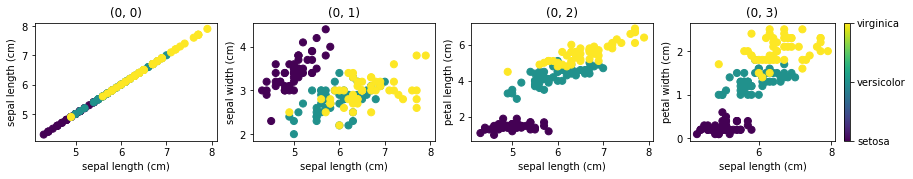

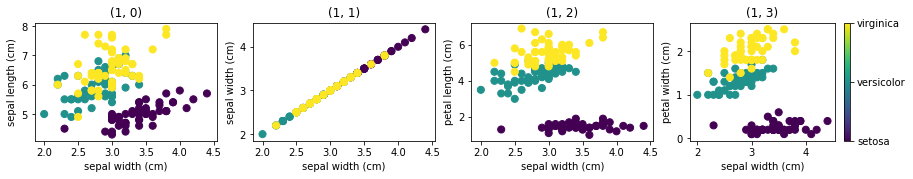

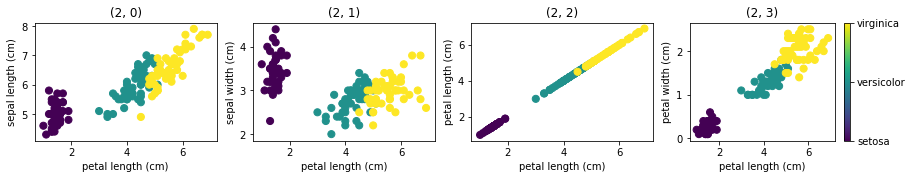

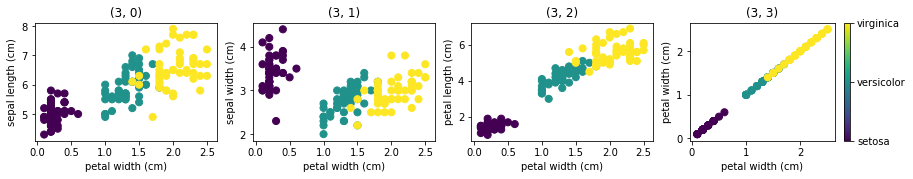

In [20]:
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

for x_index in range(4):
    compteur = 1
    plt.figure(figsize=(15,10))
    for y_index in range(4):
        titre = x_index, y_index
        plt.subplot(4, 4, compteur)
        plt.title(titre)
        plt.scatter(iris.data[:,x_index], iris.data[:,y_index],  c=iris.target, s=50)
        plt.xlabel(iris.feature_names[x_index])
        plt.ylabel(iris.feature_names[y_index])
        compteur=compteur+1
    plt.colorbar(ticks=[0, 1, 2], format=formatter)

### Meilleure visualisation et Justifications
La meilleur visualisation c'est celle de la combinaison (2,3) car les classes
sont bien séparées; ce qui permet de mieux les distinguer à l'oeil nu.

## D) Réduction de dimensions et Visualisation de données

- L'analyse en composantes principales (ACP) appliquée à ces données identifie la combinaison d'attributs qui représentent la plus grande variance des données. 

- L'analyse discriminante linéaire (LDA) tente d'identifier les attributs qui représentent le plus de variance entre les classes. 

  LDA, contrairement à PCA, est une méthode supervisée, utilisant des étiquettes de classe connues.

In [23]:
#PCA
pca = PCA(n_components=2)
irisPCA = pca.fit(data).transform(data)
print(irisPCA.shape)
print(irisPCA)

(150, 2)
[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]
 [-2.28085963  0.74133045]
 [-2.82053775 -0.08946138]
 [-2.62614497  0.16338496]
 [-2.88638273 -0.57831175]
 [-2.6727558  -0.11377425]
 [-2.50694709  0.6450689 ]
 [-2.61275523  0.01472994]
 [-2.78610927 -0.235112  ]
 [-3.22380374 -0.51139459]
 [-2.64475039  1.17876464]
 [-2.38603903  1.33806233]
 [-2.62352788  0.81067951]
 [-2.64829671  0.31184914]
 [-2.19982032  0.87283904]
 [-2.5879864   0.51356031]
 [-2.31025622  0.39134594]
 [-2.54370523  0.43299606]
 [-3.21593942  0.13346807]
 [-2.30273318  0.09870885]
 [-2.35575405 -0.03728186]
 [-2.50666891 -0.14601688]
 [-2.46882007  0.13095149]
 [-2.56231991  0.36771886]
 [-2.63953472  0.31203998]
 [-2.63198939 -0.19696122]
 [-2.58739848 -0.20431849]
 [-2.4099325   0.41092426]
 [-2.64886233  0.81336382]
 [-2.59873675  1.09314576]
 [-2.63692688 -0.12132235]
 [-2.86624165  0.06936447]
 [-2.62523805  0.59

In [24]:
#LDA
lda = LinearDiscriminantAnalysis(n_components=2)
irisLDA = lda.fit(data, target).transform(data)
print(irisLDA.shape)
print(irisLDA)

(150, 2)
[[-8.06179978e+00  3.00420621e-01]
 [-7.12868772e+00 -7.86660426e-01]
 [-7.48982797e+00 -2.65384488e-01]
 [-6.81320057e+00 -6.70631068e-01]
 [-8.13230933e+00  5.14462530e-01]
 [-7.70194674e+00  1.46172097e+00]
 [-7.21261762e+00  3.55836209e-01]
 [-7.60529355e+00 -1.16338380e-02]
 [-6.56055159e+00 -1.01516362e+00]
 [-7.34305989e+00 -9.47319209e-01]
 [-8.39738652e+00  6.47363392e-01]
 [-7.21929685e+00 -1.09646389e-01]
 [-7.32679599e+00 -1.07298943e+00]
 [-7.57247066e+00 -8.05464137e-01]
 [-9.84984300e+00  1.58593698e+00]
 [-9.15823890e+00  2.73759647e+00]
 [-8.58243141e+00  1.83448945e+00]
 [-7.78075375e+00  5.84339407e-01]
 [-8.07835876e+00  9.68580703e-01]
 [-8.02097451e+00  1.14050366e+00]
 [-7.49680227e+00 -1.88377220e-01]
 [-7.58648117e+00  1.20797032e+00]
 [-8.68104293e+00  8.77590154e-01]
 [-6.25140358e+00  4.39696367e-01]
 [-6.55893336e+00 -3.89222752e-01]
 [-6.77138315e+00 -9.70634453e-01]
 [-6.82308032e+00  4.63011612e-01]
 [-7.92461638e+00  2.09638715e-01]
 [-7.991290

### 3. Visualisation des nuages des points avec les nouveux axes obtenus

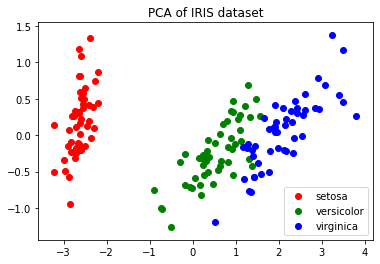

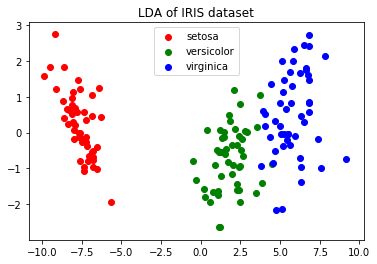

explained variance ratio (first two components): [0.92461872 0.05306648]


In [26]:
plt.figure()
for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    plt.scatter(irisPCA[target == i, 0], irisPCA[target == i, 1], c=c, label=target_name)
plt.legend()
plt.title('PCA of IRIS dataset')

plt.figure()
for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    plt.scatter(irisLDA[target == i, 0], irisLDA[target == i, 1], c=c, label=target_name)
plt.legend()
plt.title('LDA of IRIS dataset')

plt.show()

#Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

### Différences constatées entre les 2 représentations
La différence entre les 2 visualisations est certes minime mais il y a une meilleure
visualisation des classes quand on utilise la PCA que la LDA.  En effet, avec la LDA les éléments de la classe sont plus éparpillés; ce qui ne facilite pas la visualisation. Or avec la PCA les éléments des classes sont plus regroupés.